# ヒープの実装

In [1]:
# !apt install graphviz
# !pip install graphviz
from graphviz import Graph

In [2]:
def plot_heap(arr):
    g = Graph(format="png")
    data = list(map(str, arr))

    # ノードを設定
    for c in data:
        g.node(c)

    # edgeを設定
    for i in range(len(data)//2):
        g.edge(data[i], data[2*i+1])
        if 2*i + 2 < len(data):
            g.edge(data[i], data[2*i+2])
    
    return g

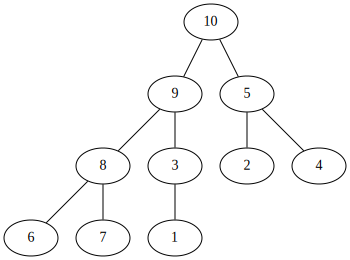

In [3]:
# 描画してみる
plot_heap([10, 9, 5, 8, 3, 2, 4, 6, 7, 1])

## 最大ヒープ

```
仕様
----------------------------------------
親要素 >= 子要素 が全ての値に関して成立する

厳密には、ヒープを表すlistについて
list[i] >= list[2*i+1]
list[i] >= list[2*i+2]
の両方が常に成立する
```

## ヒープソートを実装する

In [4]:
# ヒープの再構築 O(log(n))
def re_heap(arr: list, l: int, r: int) -> list:
    """arr[i] ( l <= i < r ) を満たす部分をヒープ化"""
    temp = arr[l]

    ptr = l
    while ptr * 2 + 1 < r:  # 葉に到達するまで繰り返す
        child1, child2 = ptr*2 + 1, ptr*2 + 2
        bigger = child2 if (child2 < r and arr[child2] > arr[child1]) else child1
        if temp >= arr[bigger]:
            break
        else:
            arr[ptr], arr[bigger] = arr[bigger], arr[ptr]
            ptr = bigger

    return arr

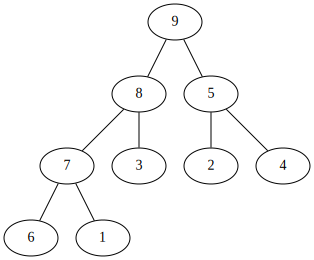

In [5]:
heap = [10, 9, 5, 8, 3, 2, 4, 6, 7, 1]  # 最大ヒープ
heap[0], heap[-1] = heap[-1], heap[0]  # ヒープソート時の取り出し操作
heap.pop()

new = re_heap(heap, 0, len(heap))
plot_heap(new)

In [6]:
# 配列をヒープ化 O(nlog(n))
def en_heap(arr: list) -> list:
    n = len(arr)
    for i in range((n-1)//2, -1, -1):
        arr = re_heap(arr, i, n)
    return arr

In [7]:
en_heap([1,2])

[2, 1]

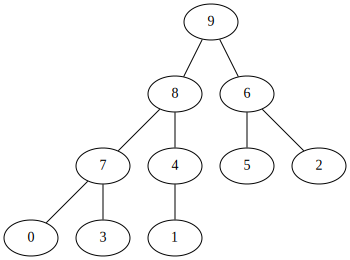

In [8]:
l = list(range(10))
heap = en_heap(l)
plot_heap(heap)

In [9]:
# 満を辞してのヒープソート
def heap_sort(arr):
    heap = en_heap(arr)

    for i in range(len(heap)-1, 0, -1):
        heap[0], heap[i] = heap[i], heap[0]
        heap = re_heap(heap, 0, i)
    
    return heap

In [10]:
l = list(range(40, 0, -1))
print(heap_sort(l))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
